## Panel 4 in Bloniasz, Oyama, Stephen (2024)

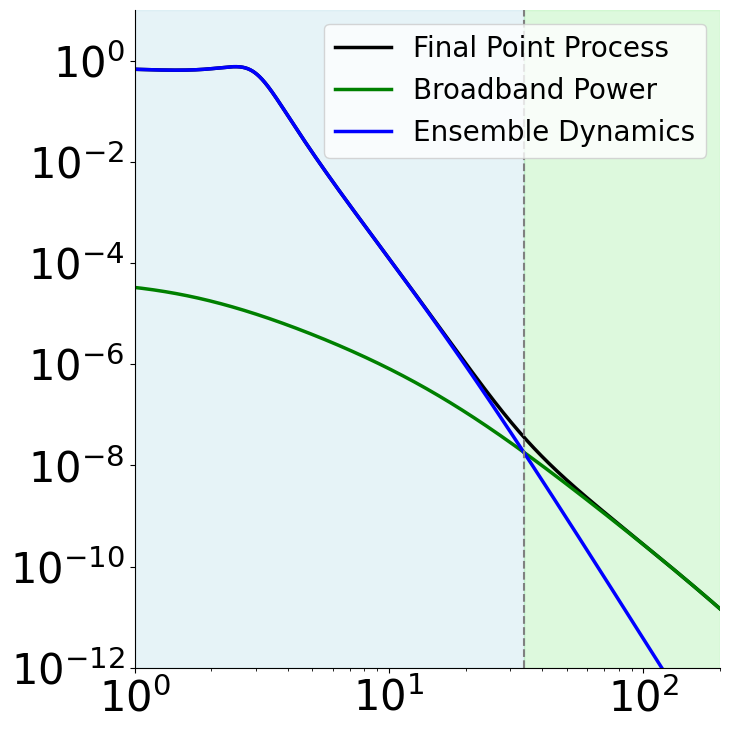

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from filtered_point_process.model import Model
from filtered_point_process.point_processes.filtered_point_process import FilteredPointProcess

# Helper to find intersections
def find_intersection(x, y1, y2):
    mask = x > 0
    x_pos = x[mask]
    y1_pos = y1[mask]
    y2_pos = y2[mask]
    diff = y1_pos - y2_pos
    idx = np.argwhere(np.diff(np.sign(diff))).flatten()
    if idx.size == 0:
        return np.array([]), np.array([])
    return x_pos[idx], y1_pos[idx]

# 1. Common simulation params
simulation_params = {
    "fs": 1000,
    "T": 5,
    "Nsims": 1,
    "simulate": False,
    "seed": 45
}

# 2. GABA CIF + Filters
model_params = {
    "ar_coeffs": [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "lambda_0": [50]
}
model = Model("ar", model_params, simulation_params)
fpp   = FilteredPointProcess(
    model=model,
    filters={"GABA": "GABA", "1/f": "1/f"},
    filter_params=None
)

# 3. Extract spectra
decomp   = fpp.decompositions[0]
freqs    = fpp.frequencies
H_gaba   = fpp.filter_instances["GABA"].kernel_spectrum
H_1f     = fpp.filter_instances["1/f"].kernel_spectrum

cif_spec = decomp["cif"]          * H_gaba * H_1f
rate_pp  = decomp["lambda_only"]  * H_gaba * H_1f
total_pp = cif_spec + rate_pp


# 5. Plot
plt.rcParams.update({
    "font.size": 30,
    "axes.titlesize": 30,
    "axes.labelsize": 30,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "legend.fontsize": 20,
})
fig, ax = plt.subplots(figsize=(8, 8))

ax.loglog(freqs, total_pp, label="Final Point Process", color="black", linewidth=2.5)
ax.loglog(freqs, rate_pp,  label="Broadband Power",      color="green", linewidth=2.5)
ax.loglog(freqs, cif_spec, label="Ensemble Dynamics",   color="blue",  linewidth=2.5)

# shade intersection
x_inter, _ = find_intersection(freqs, cif_spec, rate_pp)
if x_inter.size > 0:
    x0 = x_inter[0]
    ax.axvline(x=x0, color="gray", linestyle="--")
    ax.axvspan(1,    x0, color="lightblue", alpha=0.3)
    ax.axvspan(x0, 200, color="lightgreen",alpha=0.3)

ax.set_xlim([1, 200])
ax.set_ylim([1e-12, 1e1])
ax.legend()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig('/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/Figure_4A_PR.svg')
plt.savefig('/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/Figure_4A_PR.png', dpi = 300)
plt.show()


In [13]:
x_int, y_int = find_intersection(freqs, cif_spec, rate_pp)
if x_int.size:
    for xi in x_int:
        print(f"Intersection at {xi:.3f} Hz")
else:
    print("No intersection found")

Intersection at 33.844 Hz


Panel 1 (before) intersection at: [33.84399414]
Panel 1 (after) intersection at: [16.15905762]
Panel 2 (before) intersection at: [33.84399414]
Panel 2 (after) intersection at: [19.18029785]


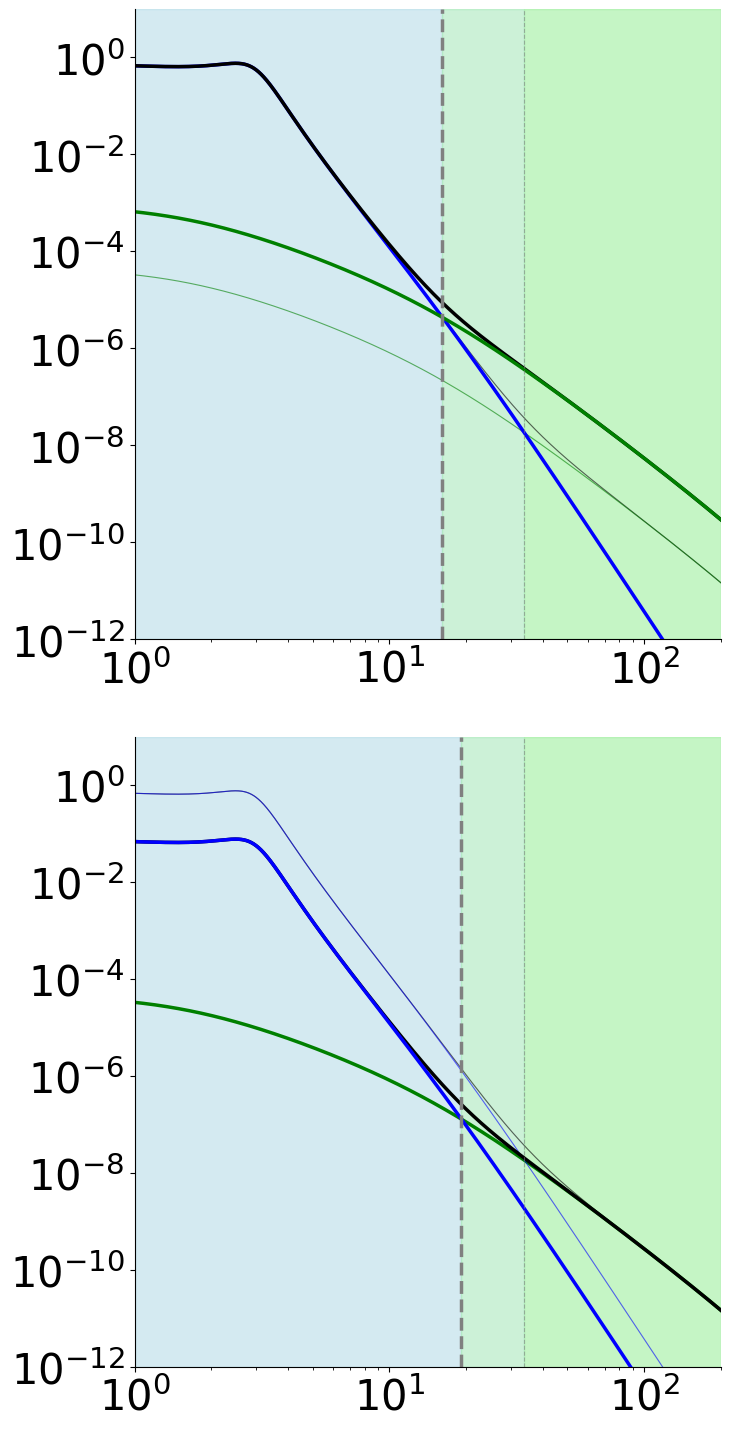

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from filtered_point_process.model import Model
from filtered_point_process.point_processes.filtered_point_process import FilteredPointProcess


# -----------------------------------
# 1. Common simulation params
# -----------------------------------
sim_params = {
    "fs":       1000,
    "T":        5,
    "Nsims":    1,
    "simulate": False,
    "seed":     45
}

# -----------------------------------
# 2. Build the four conditions
# -----------------------------------
# Panel 1: λ₀ = 200 vs λ₀ = 1000 (both φ≈0.98 → var=0.315)
# Before
params1 = {
    "ar_coeffs":            [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "lambda_0":             [50]
}
model1 = Model("ar", params1, sim_params)
fpp1   = FilteredPointProcess(model=model1,
                              filters={"GABA":"GABA","1/f":"1/f"},
                              filter_params=None)
dec1   = fpp1.decompositions[0]
H_g1   = fpp1.filter_instances["GABA"].kernel_spectrum
H_11f  = fpp1.filter_instances["1/f"].kernel_spectrum
cif_PSD      = dec1["cif"]         * H_g1 * H_11f
pp_rate      = dec1["lambda_only"] * H_g1 * H_11f
total_pp_PSD = cif_PSD + pp_rate

# After
params2 = {
    "ar_coeffs":            [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "lambda_0":             [1000]
}
model2 = Model("ar", params2, sim_params)
fpp2   = FilteredPointProcess(model=model2,
                              filters={"GABA":"GABA","1/f":"1/f"},
                              filter_params=None)
dec2   = fpp2.decompositions[0]
H_g2   = fpp2.filter_instances["GABA"].kernel_spectrum
H_21f  = fpp2.filter_instances["1/f"].kernel_spectrum
cif_PSD_2      = dec2["cif"]         * H_g2 * H_21f
pp_rate_2      = dec2["lambda_only"] * H_g2 * H_21f
total_pp_PSD_2 = cif_PSD_2 + pp_rate_2

# Panel 2: φ≈0.98 (var=0.315) vs φ≈0.95 (var=0.100), both λ₀=50
# φ≈0.98
params3 = {
    "ar_coeffs":            [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.315,
    "lambda_0":             [50]
}
model3 = Model("ar", params3, sim_params)
fpp3   = FilteredPointProcess(model=model3,
                              filters={"GABA":"GABA","1/f":"1/f"},
                              filter_params=None)
dec3   = fpp3.decompositions[0]
H_g3   = fpp3.filter_instances["GABA"].kernel_spectrum
H_31f  = fpp3.filter_instances["1/f"].kernel_spectrum
cif_PSD_3      = dec3["cif"]         * H_g3 * H_31f
pp_rate_3      = dec3["lambda_only"] * H_g3 * H_31f
total_pp_PSD_3 = cif_PSD_3 + pp_rate_3

# φ≈0.95
params4 = {
    "ar_coeffs":            [1.9897557323136878, -0.9901],
    "white_noise_variance": 0.100,
    "lambda_0":             [50]
}
model4 = Model("ar", params4, sim_params)
fpp4   = FilteredPointProcess(model=model4,
                              filters={"GABA":"GABA","1/f":"1/f"},
                              filter_params=None)
dec4   = fpp4.decompositions[0]
H_g4   = fpp4.filter_instances["GABA"].kernel_spectrum
H_41f  = fpp4.filter_instances["1/f"].kernel_spectrum
cif_PSD_4      = dec4["cif"]         * H_g4 * H_41f
pp_rate_4      = dec4["lambda_only"] * H_g4 * H_41f
total_pp_PSD_4 = cif_PSD_4 + pp_rate_4

# frequency axis (same for all)
frequencies = fpp1.frequencies

# -----------------------------------
# 3. Plotting
# -----------------------------------
plt.rcParams.update({
    "font.size":       30,
    "axes.titlesize":  30,
    "axes.labelsize":  30,
    "xtick.labelsize": 30,
    "ytick.labelsize": 30,
    "legend.fontsize": 20,
})

fig, axs = plt.subplots(2, 1, figsize=(8, 15))

# styling dicts
line_styles = {
    "pp_before":  "-", "pp_after":  "-",
    "rate_before":"-", "rate_after":"-",
    "cif_before": "-", "cif_after": "-"
}
alpha_levels = {
    "pp_before":   0.6, "pp_after":   1.0,
    "rate_before": 0.6, "rate_after": 1.0,
    "cif_before":  0.6, "cif_after":  1.0
}
line_thickness = {
    "pp_before":   0.8, "pp_after":   2.5,
    "rate_before": 0.8, "rate_after": 2.5,
    "cif_before":  0.8, "cif_after":  2.5
}
colors = {
    "pp_before":   "black", "pp_after":   "black",
    "rate_before": "green", "rate_after": "green",
    "cif_before":  "blue",  "cif_after":  "blue"
}

# Panel 1: λ₀ comparison
ax = axs[0]
# before
ax.loglog(
    frequencies, total_pp_PSD,
    label="PP (λ₀=200)",
    linestyle=line_styles["pp_before"],
    alpha=alpha_levels["pp_before"],
    color=colors["pp_before"],
    linewidth=line_thickness["pp_before"]
)
ax.loglog(
    frequencies, pp_rate,
    label="Rate (λ₀=200)",
    linestyle=line_styles["rate_before"],
    alpha=alpha_levels["rate_before"],
    color=colors["rate_before"],
    linewidth=line_thickness["rate_before"]
)
ax.loglog(
    frequencies, cif_PSD,
    label="CIF (λ₀=200)",
    linestyle=line_styles["cif_after"],
    alpha=alpha_levels["cif_after"],
    color=colors["cif_after"],
    linewidth=line_thickness["cif_after"]
)
# after
ax.loglog(
    frequencies, total_pp_PSD_2,
    label="PP (λ₀=1000)",
    linestyle=line_styles["pp_after"],
    alpha=alpha_levels["pp_after"],
    color=colors["pp_after"],
    linewidth=line_thickness["pp_after"]
)
ax.loglog(
    frequencies, pp_rate_2,
    label="Rate (λ₀=1000)",
    linestyle=line_styles["rate_after"],
    alpha=alpha_levels["rate_after"],
    color=colors["rate_after"],
    linewidth=line_thickness["rate_after"]
)

ax.set_xlim([1, 200])
ax.set_ylim([1e-12, 1e1])

for (cif, rate, style) in [
    (cif_PSD,   pp_rate,   "before"),
    (cif_PSD_2, pp_rate_2, "after")
]:
    # unpack the two arrays
    x_int, y_int = find_intersection(frequencies, cif, rate)
    print(f"Panel 1 ({style}) intersection at: {x_int}")
    if x_int.size:
        lw = line_thickness[f"pp_{style}"]
        ax = axs[0]
        ax.axvline(
            x=x_int[0],
            color="gray",
            linestyle="--",
            linewidth=lw,
            alpha=alpha_levels[f"pp_{style}"]
        )
        ax.axvspan(1,        x_int[0], color="lightblue",  alpha=0.3)
        ax.axvspan(x_int[0], 200,      color="lightgreen", alpha=0.3)
# Panel 2: φ comparison
ax = axs[1]
# φ≈0.98
ax.loglog(
    frequencies, total_pp_PSD_3,
    label="PP (φ=0.98)",
    linestyle=line_styles["pp_before"],
    alpha=alpha_levels["pp_before"],
    color=colors["pp_before"],
    linewidth=line_thickness["pp_before"]
)
ax.loglog(
    frequencies, pp_rate_3,
    label="Rate (φ=0.98)",
    linestyle=line_styles["rate_after"],
    alpha=alpha_levels["rate_after"],
    color=colors["rate_after"],
    linewidth=line_thickness["rate_after"]
)
ax.loglog(
    frequencies, cif_PSD_3,
    label="CIF (φ=0.98)",
    linestyle=line_styles["cif_before"],
    alpha=alpha_levels["cif_before"],
    color=colors["cif_before"],
    linewidth=line_thickness["cif_before"]
)
# φ≈0.95
ax.loglog(
    frequencies, total_pp_PSD_4,
    label="PP (φ=0.95)",
    linestyle=line_styles["pp_after"],
    alpha=alpha_levels["pp_after"],
    color=colors["pp_after"],
    linewidth=line_thickness["pp_after"]
)
ax.loglog(
    frequencies, cif_PSD_4,
    label="CIF (φ=0.95)",
    linestyle=line_styles["cif_after"],
    alpha=alpha_levels["cif_after"],
    color=colors["cif_after"],
    linewidth=line_thickness["cif_after"]
)

ax.set_xlim([1, 200])
ax.set_ylim([1e-12, 1e1])

for (cif, rate, style) in [
    (cif_PSD_3, pp_rate_3, "before"),
    (cif_PSD_4, pp_rate_4, "after")
]:
    # unpack the two arrays
    x_int, y_int = find_intersection(frequencies, cif, rate)
    print(f"Panel 2 ({style}) intersection at: {x_int}")
    if x_int.size:
        lw = line_thickness[f"pp_{style}"]
        ax = axs[1]
        ax.axvline(
            x=x_int[0],
            color="gray",
            linestyle="--",
            linewidth=lw,
            alpha=alpha_levels[f"pp_{style}"]
        )
        ax.axvspan(1,        x_int[0], color="lightblue",  alpha=0.3)
        ax.axvspan(x_int[0], 200,      color="lightgreen", alpha=0.3)
# finalize styling
for ax in axs:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    #ax.legend(loc="lower left")

plt.tight_layout()
plt.savefig('/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/Figure_4B_PR.svg')
plt.savefig('/Users/patrick_bloniasz/filtered-point-process/filtered_point_process/Notebooks/Figures_Bloniasz_et_al_2024/Figure_4B_PR.png', dpi = 300)
plt.show()


In [8]:
# -----------------------------------
# Print out all four intersections
# -----------------------------------
x1, _ = find_intersection(frequencies, cif_PSD,   pp_rate)
print("Panel 1 (λ₀=50 → raw) intersection(s):", x1)

x2, _ = find_intersection(frequencies, cif_PSD_2, pp_rate_2)
print("Panel 1 (λ₀=1000 → filtered) intersection(s):", x2)

x3, _ = find_intersection(frequencies, cif_PSD_3, pp_rate_3)
print("Panel 2 (φ≈0.98) intersection(s):", x3)

x4, _ = find_intersection(frequencies, cif_PSD_4, pp_rate_4)
print("Panel 2 (φ≈0.95) intersection(s):", x4)

Panel 1 (λ₀=50 → raw) intersection(s): [33.84399414]
Panel 1 (λ₀=1000 → filtered) intersection(s): [16.15905762]
Panel 2 (φ≈0.98) intersection(s): [33.84399414]
Panel 2 (φ≈0.95) intersection(s): [19.18029785]
